In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from IPython.display import display 
import math as m
from pandas import DataFrame
from matplotlib.pyplot import figure

In [2]:
train_dataset = pd.read_csv('Datasets/k_means.txt', sep=" " , header = None, dtype = 'float64')
train_dataset = np.array(train_dataset)
train_dataset

array([[-7.87157, -4.86573],
       [-4.76661, -6.87944],
       [-6.67986, -5.8308 ],
       ...,
       [ 6.91832, -0.32132],
       [-8.23828, -4.00405],
       [-5.75112, -5.99531]])

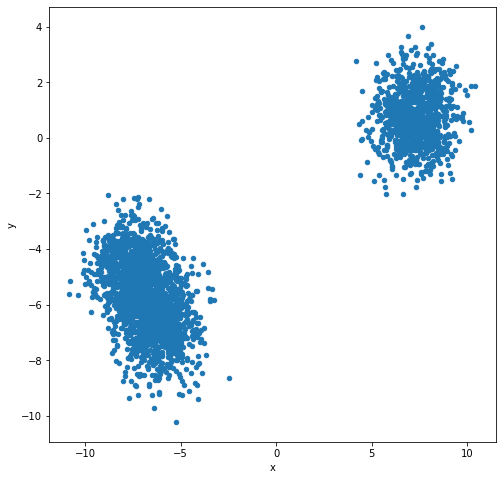

In [3]:
df = DataFrame(dict(x=train_dataset[:,0],y=train_dataset[:,1]))
fig,ax = plt.subplots(figsize = (8,8))
df.plot(ax=ax, kind = 'scatter',x='x',y='y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [4]:
k = int(input())

2


In [5]:
centroid = []
for i in range(k):
    a = []
    a.append(train_dataset[i][0])
    a.append(train_dataset[i][1])
    centroid.append(a)
centroid = np.array(centroid)
centroid

array([[-7.87157, -4.86573],
       [-4.76661, -6.87944]])

In [7]:
total = []
for i in range(train_dataset.shape[0]):
    temp = []
    storeSmallValueForCentroid_a = 2147483647
    storeSmallValueForCentroid_b = ''
    for j in range(centroid.shape[0]):
        a = m.sqrt((train_dataset[i][0]- centroid[j][0])**2 + (train_dataset[i][1]- centroid[j][1])**2)
        b = 'c' + str(j)
        if a < storeSmallValueForCentroid_a:
            storeSmallValueForCentroid_a = a
            storeSmallValueForCentroid_b = b
    temp.append(train_dataset[i][0])
    temp.append(train_dataset[i][1])
    temp.append(storeSmallValueForCentroid_b)
    total.append(temp)


In [8]:
itr = 0
while True:
    flag = 0
    for i in range(k):
        x = 0
        y = 0
        s = 'c'+str(i)
        cnt = 0
        for j in range(train_dataset.shape[0]):
            if total[j][2] == s:
                cnt = cnt + 1
                x = x + total[j][0]
                y = y + total[j][1]
        
        newCentroid_x = x / cnt
        newCentroid_y = y / cnt
        centroid[i][0] = newCentroid_x
        centroid[i][1] = newCentroid_y
        
    for i in range(train_dataset.shape[0]):
        storeSmallValueForCentroid_a = 2147483647
        storeSmallValueForCentroid_b = ''
        for j in range(centroid.shape[0]):
            a = m.sqrt((total[i][0]- centroid[j][0])**2 + (total[i][1]- centroid[j][1])**2)
            b = 'c' + str(j)
            if a < storeSmallValueForCentroid_a:
                storeSmallValueForCentroid_a = a
                storeSmallValueForCentroid_b = b
        if storeSmallValueForCentroid_b != total[i][2]:
            total[i][2] = storeSmallValueForCentroid_b
            flag  = 1
    itr = itr + 1
    if flag == 0:
        break
      

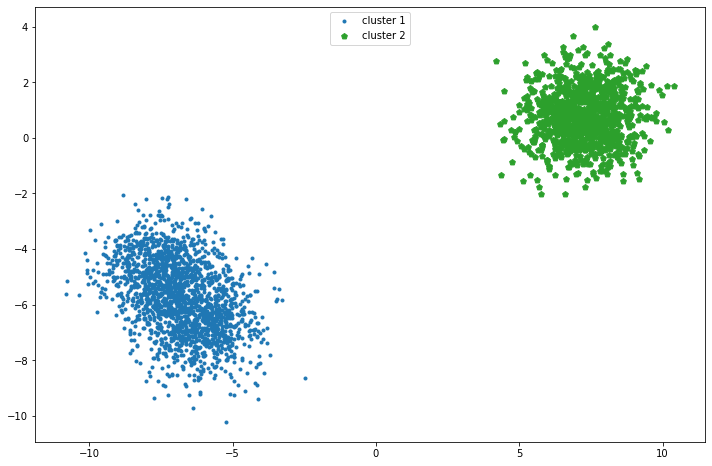

In [11]:
color=['#1f77b4','#2ca02c','#ff7f0e','#d62728','m','y','k','#0eeabf','#9467bd','#8c564b','#e377c2','#bcbd22']
marker=['.','p','s','^','s','v','+','D','X','P','2','H','3','d','4','5','6','7','8','9','10','11']
f, ax = plt.subplots()
f.set_figheight(8)
f.set_figwidth(12)
for i in range(k):
    s = 'c'+str(i)
    plotingList = []
    for j in range(train_dataset.shape[0]):
        if total[j][2] == s:
            a = []
            a.append(total[j][0])
            a.append(total[j][1])
            plotingList.append(a)
    cluster = 'cluster ' + str(i + 1)
    plotingList = np.array(plotingList)
    ax.scatter(plotingList[:,0],plotingList[:,1],marker=marker[i],color=color[i],label=cluster )

ax.legend(loc='upper center')
plt.show()
    
    